In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
concerns = pd.read_csv(r'..\vis_presentacion\neo4j_query_table_data_2025-7-2.csv')
concerns.columns = ['ChemicalName', 'ChemCommunity', 'hazard_score', 'Cancer', 
                    'Allergies & Immunotoxicity','Developmental and Reproductive Toxicity', 'Use Restrictions']
concerns.head()
concerns.ChemCommunity = concerns.ChemCommunity.astype('category')
concerns['Cancer'] = concerns['Cancer'].astype('category')
concerns['Allergies & Immunotoxicity'] = concerns['Allergies & Immunotoxicity'].astype('category')
concerns['Developmental and Reproductive Toxicity'] = concerns['Developmental and Reproductive Toxicity'].astype('category')
concerns['Use Restrictions'] = concerns['Use Restrictions'].astype('category')

In [40]:
concerns.dropna(inplace=True)
concerns

,ChemicalName,ChemCommunity,hazard_score,Cancer,Allergies & Immunotoxicity,Developmental and Reproductive Toxicity,Use Restrictions
0,titanium dioxide,100,1.0,MODERATE,LOW,LOW,LOW
1,coal tar,30,10.0,HIGH,MODERATE,LOW_MODERATE,HIGH
2,estragole,47,4.0,MODERATE,MODERATE,LOW,LOW
3,cocamide dea,30,8.0,MODERATE,MODERATE,LOW,HIGH
4,toluene,40,9.0,LOW,LOW,MODERATE,HIGH
...,...,...,...,...,...,...,...
79,benzophenone-2,40,4.0,LOW,MODERATE,LOW,LOW
80,vinyl acetate,20,6.0,LOW_MODERATE,LOW,LOW,HIGH
81,trichloroacetic acid,20,6.0,LOW_MODERATE,LOW,LOW,HIGH
84,ethanol,40,1.0,LOW,LOW,LOW,LOW


In [41]:
df_melted = concerns.melt(id_vars='ChemCommunity', 
                          value_vars=["Cancer", "Allergies & Immunotoxicity", 
                                      "Developmental and Reproductive Toxicity",
                                      "Use Restrictions"],
                          var_name='Concern', value_name='Score')
df_melted

,ChemCommunity,Concern,Score
0,100,Cancer,MODERATE
1,30,Cancer,HIGH
2,47,Cancer,MODERATE
3,30,Cancer,MODERATE
4,40,Cancer,LOW
...,...,...,...
299,40,Use Restrictions,LOW
300,20,Use Restrictions,HIGH
301,20,Use Restrictions,HIGH
302,40,Use Restrictions,LOW


In [42]:
df_melted.ChemCommunity = df_melted.ChemCommunity.astype('object')
df_melted.Score = df_melted.Score.astype(str)

In [48]:
df_melted1 = df_melted[(df_melted['ChemCommunity']==100)|(df_melted['ChemCommunity']==20)|(df_melted['ChemCommunity']==30)|(df_melted['ChemCommunity']==40)].copy()
df_melted2 = df_melted[(df_melted['ChemCommunity']==44)|(df_melted['ChemCommunity']==47)|(df_melted['ChemCommunity']==59)].copy()

<Figure size 1500x800 with 0 Axes>

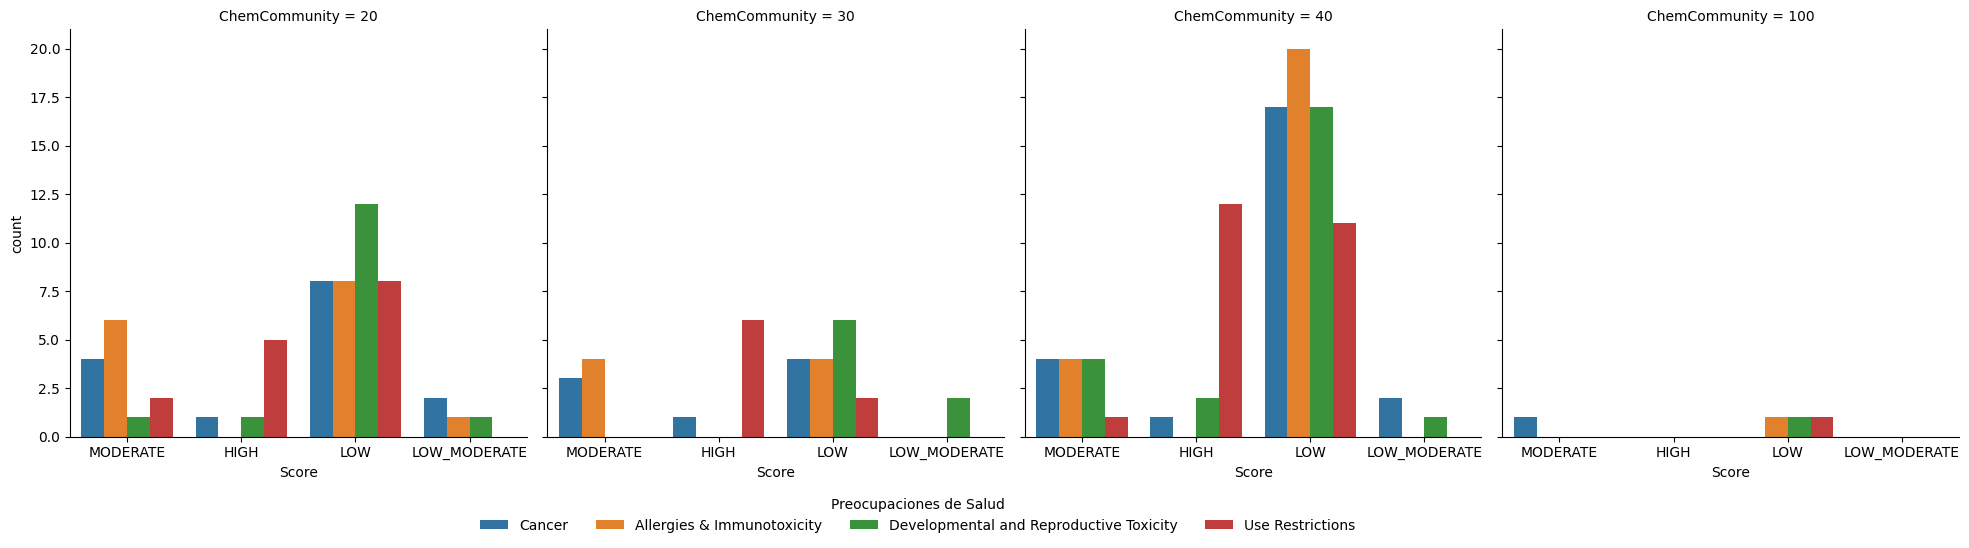

In [54]:
plt.figure(figsize=(15, 8))
ax = sns.catplot(data=df_melted1, x='Score', hue='Concern', col='ChemCommunity', kind='count', legend_out=True, legend='full')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.4, -0.1), ncol=4, title='Preocupaciones de Salud', frameon=False)

<Figure size 1500x800 with 0 Axes>

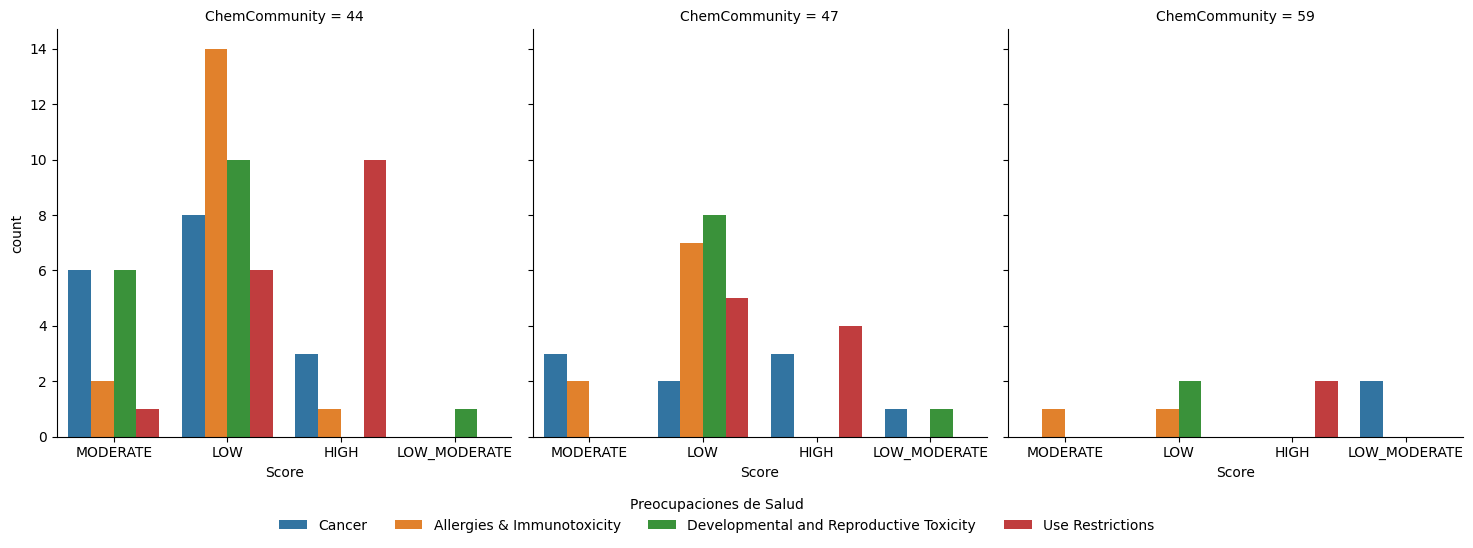

In [50]:
plt.figure(figsize=(15, 8))
ax = sns.catplot(data=df_melted2, x='Score', hue='Concern', col='ChemCommunity', kind='count', legend_out=True, legend='full')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.4, -0.1), ncol=4, title='Preocupaciones de Salud', frameon=False)

In [ ]:
# Comunidad pegrilosa
concerns[concerns['ChemCommunity']==44].ChemicalName.unique()

array(['acrylamide', 'formaldehyde', 'ethylene glycol', 'trade secret',
       'methanol', '1,4-dioxane', 'dichloroacetic acid', 'ethylene oxide',
       'lead', 'dichloromethane', 'benzene', 'benzyl chloride',
       'dimethylnitrosamine', 'propylene oxide', 'methyl chloride',
       'candium', 'mercury'], dtype=object)